<a href="https://colab.research.google.com/github/shubhpjoshi/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Mid_term_project_%7C_Applied_Statistics_Project_Shubham_Joshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name**:- Customer Purchase Behavior Analysis using Descriptive Statistics

**Contribution**:- Shubham Joshi

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [2]:
# To help reading and manipulating data
import pandas as pd
import numpy as np

#To help the data Visulization
import seaborn as sns
import matplotlib.pyplot as plt

# To be used for missing values imputation
from sklearn.impute import SimpleImputer

# To supress warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Dataset First Look
df = pd.read_csv('/content/drive/MyDrive/Superstore Marketing Data - Sheet1 (1).csv')
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [7]:
# shape of the dataframe
print(df.shape)
print("Total number of Rows are ",df.shape[0])
print("Total number of columns are ",df.shape[1])

(2240, 22)
Total number of Rows are  2240
Total number of columns are  22


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Checking the datatype of each columns
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [11]:
# Checking missing values in each column
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [12]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [14]:
# Drop Id columns
df.drop(columns=["Id"], inplace=True)

In [15]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,########,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,########,0,6,16,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,########,99,372,18,...,47,48,78,2,5,2,11,4,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,...,3,8,16,1,1,0,3,8,0,0
2237,1976,Graduation,Divorced,46310.0,1,0,########,99,185,2,...,15,5,14,2,6,1,5,8,0,0
2238,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,...,149,165,63,1,5,4,10,3,0,0


In [16]:
# Replace "########" with NaN in the "Dt_Customer" column
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NA)

# Drop rows with missing values in the "Dt_Customer" column
df = df.dropna(subset=['Dt_Customer'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
5,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,...,240,32,43,1,4,7,5,2,1,0
6,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,80,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,6,...,7,6,12,1,1,0,3,8,0,0
2233,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,6,...,7,4,25,1,2,1,2,5,0,1
2234,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,11,...,33,26,34,3,9,3,5,4,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,...,3,8,16,1,1,0,3,8,0,0


In [17]:
import pandas as pd

# Check for missing values in the Income column
missing_values = df['Income'].isnull().sum()
print("Number of missing values in Income column:", missing_values)


Number of missing values in Income column: 13


In [18]:
import pandas as pd

# Assuming df is your DataFrame
df.dropna(subset=['Income'], inplace=True)


In [19]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

###Before performing the subtraction, we must first convert the string values to dates in order to calculate age accurately, given that our records extend back to 2014.

In [20]:
df["Age"] = 2021 - pd.to_datetime(df["Year_Birth"], format="%Y").apply(lambda x: x.year)

df["Age"].sort_values().tail()

1475     78
1740     80
2233    121
827     122
513     128
Name: Age, dtype: int64

In [21]:
df[df['Age']>100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,0,2,1,1,0,2,4,0,0,128
827,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,64,224,1,4,6,4,1,0,0,122
2233,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,4,25,1,2,1,2,5,0,1,121


In [22]:
df.drop(df[df['Age']>100].index,inplace = True)

In [23]:
#After dropping checking shape
df.shape
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,51
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,60
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,63
5,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,...,32,43,1,4,7,5,2,1,0,63
6,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,...,34,65,1,10,10,7,6,1,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,6,...,6,12,1,1,0,3,8,0,0,47
2230,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,6,...,6,12,1,1,0,3,8,0,0,47
2234,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,11,...,26,34,3,9,3,5,4,0,0,48
2236,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,8,16,1,1,0,3,8,0,0,44


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [24]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,1968.856269,51409.820336,0.435780,0.502294,49.294343,302.906728,25.198777,162.650612,36.464832,26.932722,43.783639,2.320336,4.085627,2.595566,5.801223,5.415138,0.152141,0.008410,52.143731
std,11.615525,20960.032649,0.530339,0.542736,28.791280,339.135952,38.521075,219.607191,54.488028,41.065179,51.898360,1.898491,2.710518,2.833974,3.269614,2.432813,0.359295,0.091353,11.615525
min,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,1959.000000,35434.750000,0.000000,0.000000,24.750000,23.000000,1.000000,15.000000,2.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,44.000000
50%,1970.000000,50442.000000,0.000000,0.000000,50.000000,171.500000,7.000000,66.000000,11.000000,8.000000,25.000000,2.000000,4.000000,1.000000,5.000000,6.000000,0.000000,0.000000,51.000000
75%,1977.000000,68179.500000,1.000000,1.000000,74.000000,495.250000,31.000000,217.000000,45.250000,32.000000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,62.000000
max,1996.000000,157146.000000,2.000000,2.000000,99.000000,1492.000000,197.000000,1725.000000,253.000000,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,80.000000


**Using decribe function we get mean, Standerd deviation, minimum, maximum, 25,50,75 persentile of each columns.**

In [ ]:
df.dtypes

In [25]:
relevant_cols=['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']

In [66]:
# Dictionary to store column-wise means
column_means = {}

# Calculate mean for each column using a for loop
for col in relevant_cols:
    column_means[col] = df[col].mean()

# Print the calculated means
for col, mean in column_means.items():
    print(f"Mean of {col}: {mean}")
    print('-----------------------------')


Mean of Income: 51409.820336391436
-----------------------------
Mean of Kidhome: 0.43577981651376146
-----------------------------
Mean of Teenhome: 0.5022935779816514
-----------------------------
Mean of Recency: 49.29434250764526
-----------------------------
Mean of MntWines: 302.90672782874617
-----------------------------
Mean of MntFruits: 25.198776758409785
-----------------------------
Mean of MntMeatProducts: 162.6506116207951
-----------------------------
Mean of MntFishProducts: 36.464831804281346
-----------------------------
Mean of MntSweetProducts: 26.932721712538225
-----------------------------
Mean of MntGoldProds: 43.78363914373089
-----------------------------
Mean of NumDealsPurchases: 2.320336391437309
-----------------------------
Mean of NumWebPurchases: 4.085626911314985
-----------------------------
Mean of NumCatalogPurchases: 2.595565749235474
-----------------------------
Mean of NumStorePurchases: 5.801223241590214
-----------------------------
Mean of N

In [26]:
# Displaying median and variance of the features
for cols in relevant_cols:
    print(f"Median of {cols}: {np.median(df[cols])}")
    print(f"Variance of {cols}: {round(np.var(df[cols]), 2)}")
    print('-----------------------------')


Median of Income: 50442.0
Variance of Income: 438987094.83
-----------------------------
Median of Kidhome: 0.0
Variance of Kidhome: 0.28
-----------------------------
Median of Teenhome: 0.0
Variance of Teenhome: 0.29
-----------------------------
Median of Recency: 50.0
Variance of Recency: 828.3
-----------------------------
Median of MntWines: 171.5
Variance of MntWines: 114925.26
-----------------------------
Median of MntFruits: 7.0
Variance of MntFruits: 1482.74
-----------------------------
Median of MntMeatProducts: 66.0
Variance of MntMeatProducts: 48190.45
-----------------------------
Median of MntFishProducts: 11.0
Variance of MntFishProducts: 2966.68
-----------------------------
Median of MntSweetProducts: 8.0
Variance of MntSweetProducts: 1685.06
-----------------------------
Median of MntGoldProds: 25.0
Variance of MntGoldProds: 2691.38
-----------------------------
Median of NumDealsPurchases: 2.0
Variance of NumDealsPurchases: 3.6
-----------------------------
Median

In [27]:
# Adding a new column called total_amount_spent
df["Total_Amount_Spent"] = df[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

In [31]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Widow'], dtype=object)

In [28]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
df["Marital_Status"] = df["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
df["Marital_Status"] = df["Marital_Status"].replace(["Together"], "Married")

In [29]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Total_Amount_Spent
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,218,1,4,4,6,1,1,0,51,1190
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,37,1,7,3,7,5,1,0,60,577
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,30,1,3,2,5,2,0,0,63,251
5,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,...,43,1,4,7,5,2,1,0,63,1192
6,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,...,65,1,10,10,7,6,1,0,67,1215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,6,...,12,1,1,0,3,8,0,0,47,34
2230,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,6,...,12,1,1,0,3,8,0,0,47,34
2234,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,11,...,34,3,9,3,5,4,0,0,48,734
2236,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,16,1,1,0,3,8,0,0,44,55


## Outlier Detection Handling

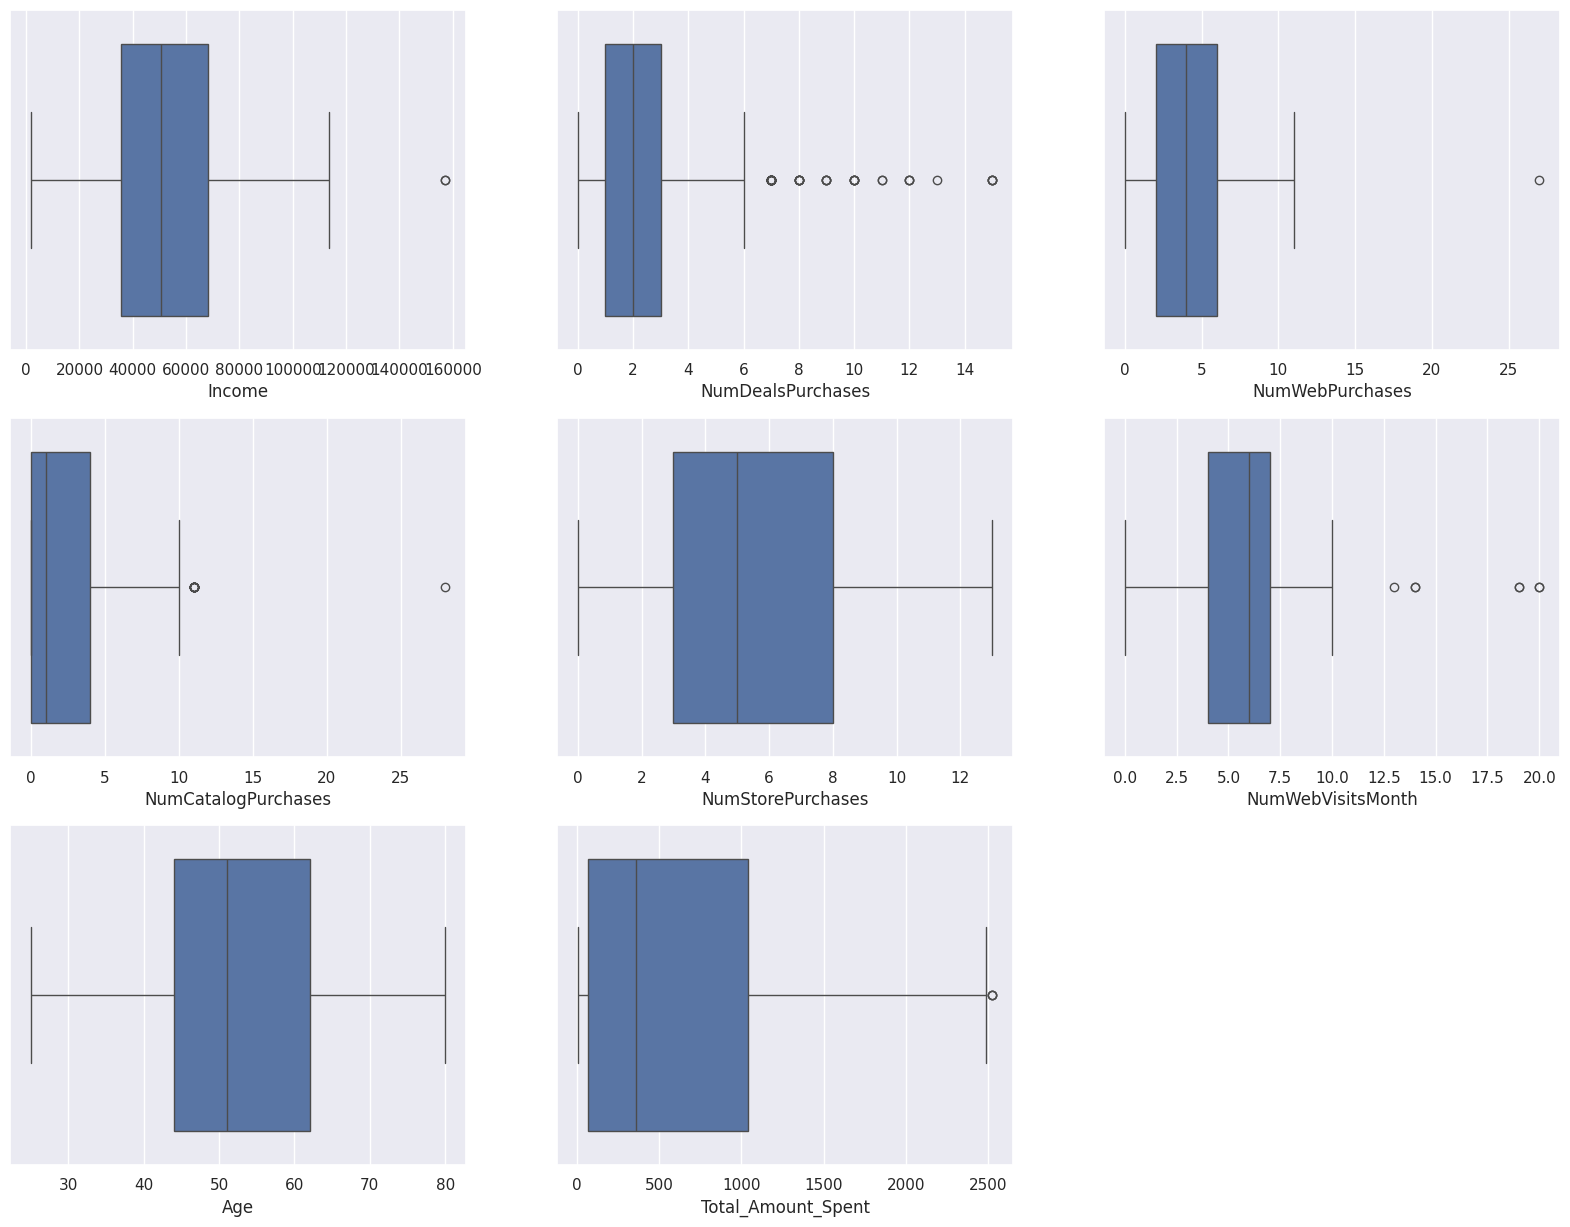

In [53]:

# List of important numerical columns
important_numerical_column = ['Income', 'NumDealsPurchases', 'NumWebPurchases',
                              'NumCatalogPurchases', 'NumStorePurchases',
                              'NumWebVisitsMonth', 'Age', 'Total_Amount_Spent']

# Setting up the figure size
plt.figure(figsize=(20, 15))

# Setting seaborn color codes
sns.set(color_codes=True)

# Plotting box plots for each numerical column
for index, col in enumerate(important_numerical_column):
    plt.subplot(3, 3, index+1)
    sns.boxplot(x=df[col])  # Using seaborn's boxplot for visualizing outliers

plt.show()  # Displaying the plot

There are some outlier in many column but we can't that are actually outliers. It can be anamolies

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



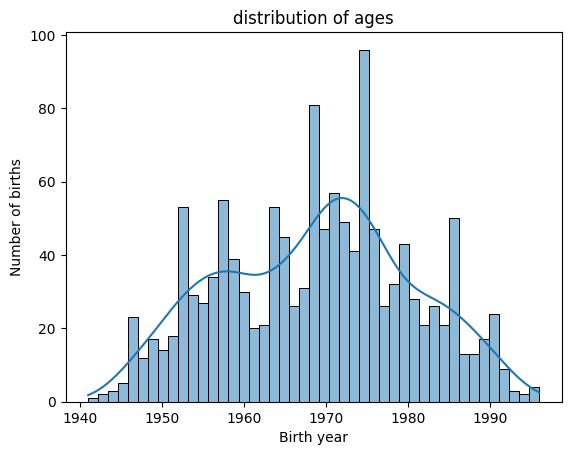

In [38]:
#distribution of ages according to birth year

sns.histplot(df['Year_Birth'], bins=45, kde=True)
plt.title ("distribution of ages")
plt.xlabel("Birth year")
plt.ylabel("Number of births")
plt.show()


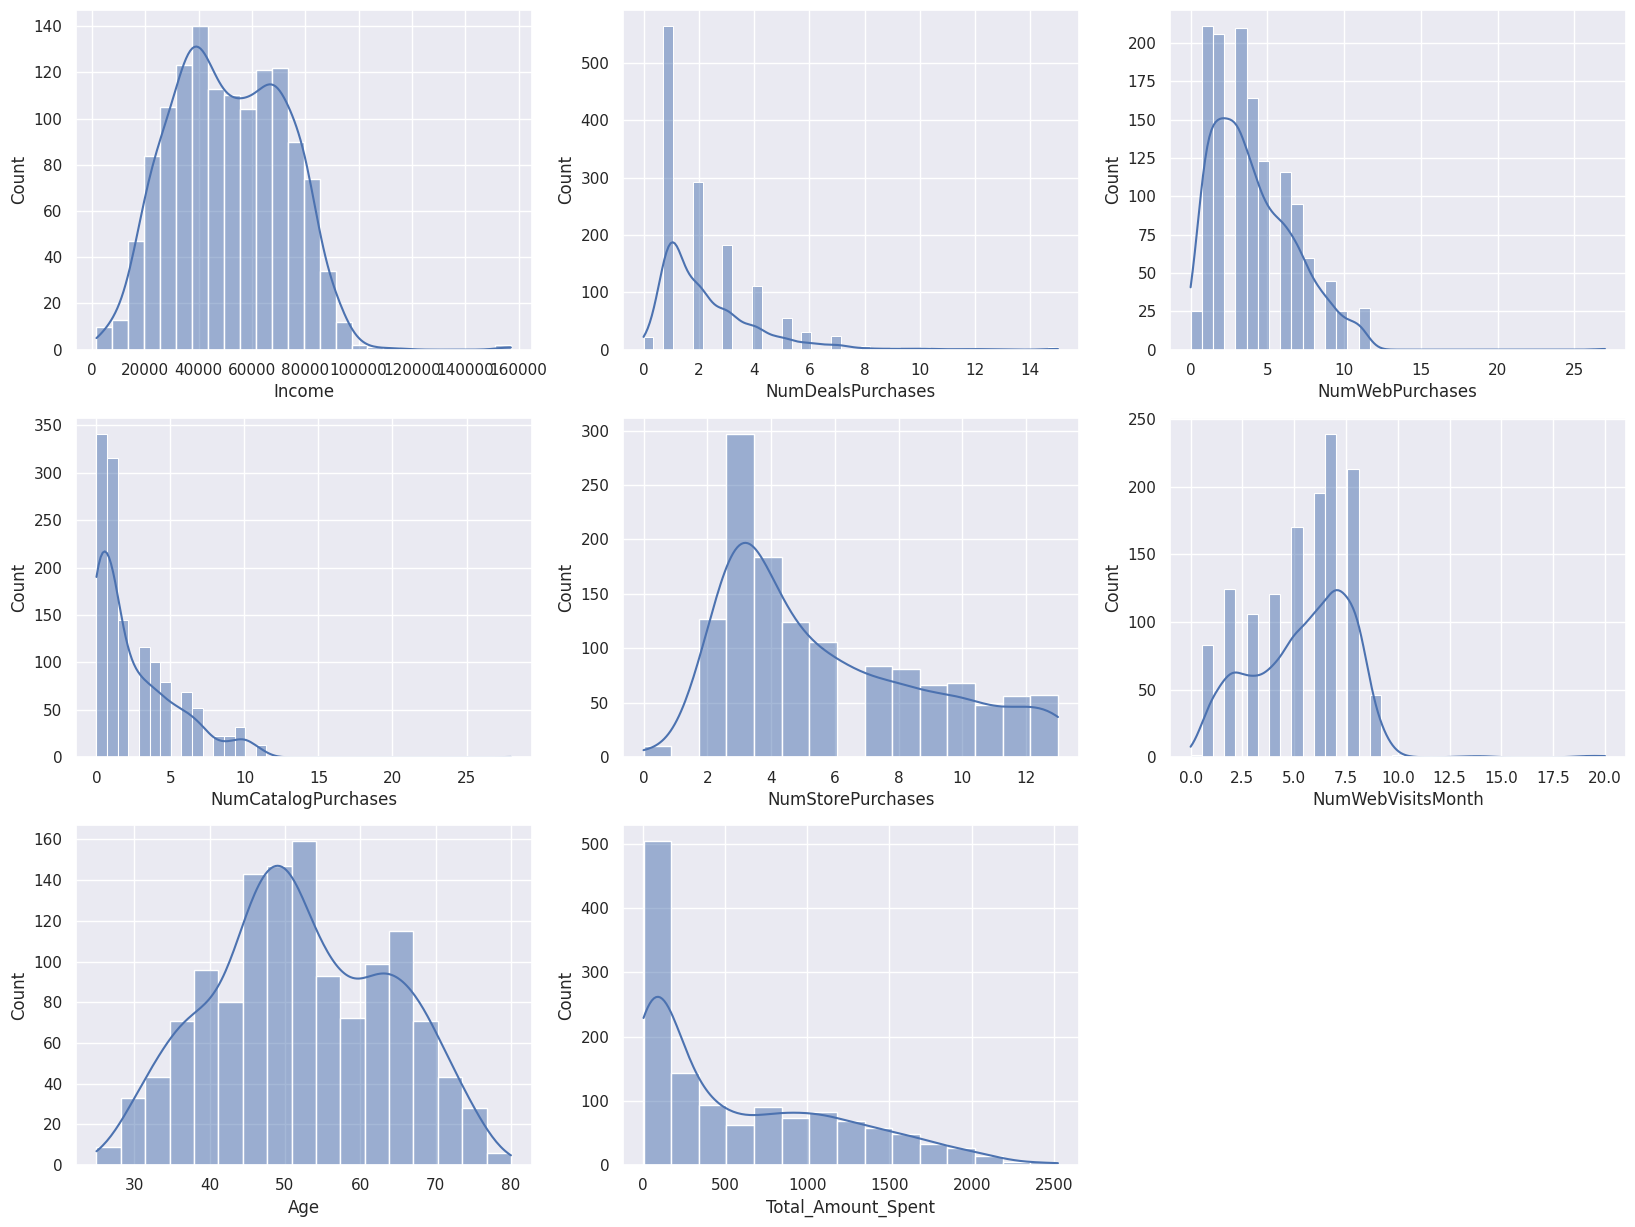

In [59]:
#Distribution of some important numerical variable
important_numerical_column = ['Income',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Age','Total_Amount_Spent']
plt.figure(figsize = (20,15))
sns.set(color_codes = True)

for index,col in enumerate(important_numerical_column):
  plt.subplot(3,3,index+1)
  sns.histplot(df[col], kde = True)

In [60]:
# List of columns for which skewness needs to be calculated
columns_to_check = ['Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'Age', 'Total_Amount_Spent']

# Loop through each column and calculate skewness
for col in columns_to_check:
    print(f"Skewness of {col}: {df[col].skew()}")


Skewness of Year_Birth: -0.04538184478214389
Skewness of Income: 0.21859218798561586
Skewness of NumDealsPurchases: 2.4566232530930554
Skewness of NumWebPurchases: 1.0884570433215892
Skewness of NumCatalogPurchases: 1.6036695828286183
Skewness of NumStorePurchases: 0.7224147063304396
Skewness of NumWebVisitsMonth: 0.3008672655387497
Skewness of Age: 0.04538184478213289
Skewness of Total_Amount_Spent: 0.8931994906726313


From the above distplot we have been checked the skewness of numerical column and if skewness is lies between (-0.5, 0.5) then the distribution of dataset is normally otherwise not, So the columns with normally distrubuted(closed to normal distribution) are Income, NumWebVisitsMonth, NumWebVisitMonth and Some columns are right skewed and some are left skewed.

In [68]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Age', 'Total_Amount_Spent'],
      dtype='object')

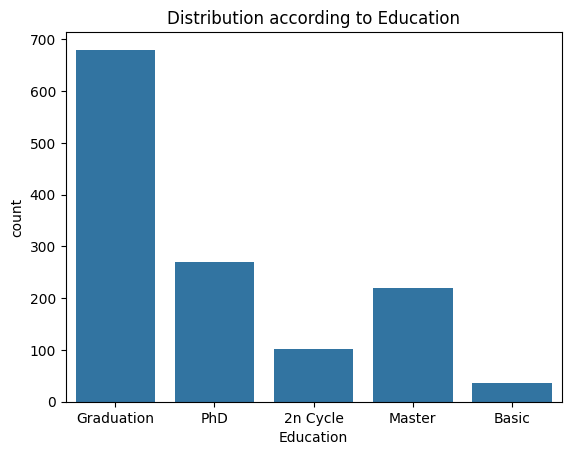

In [43]:
# Distribution by Education
sns.countplot(x=df['Education'],data=df)
plt.title('Distribution according to Education')
plt.show()

The majority of the customers in dataset have the graduation degree.This suggests the company marketing survey are more effective if they target customers with the higher level education.

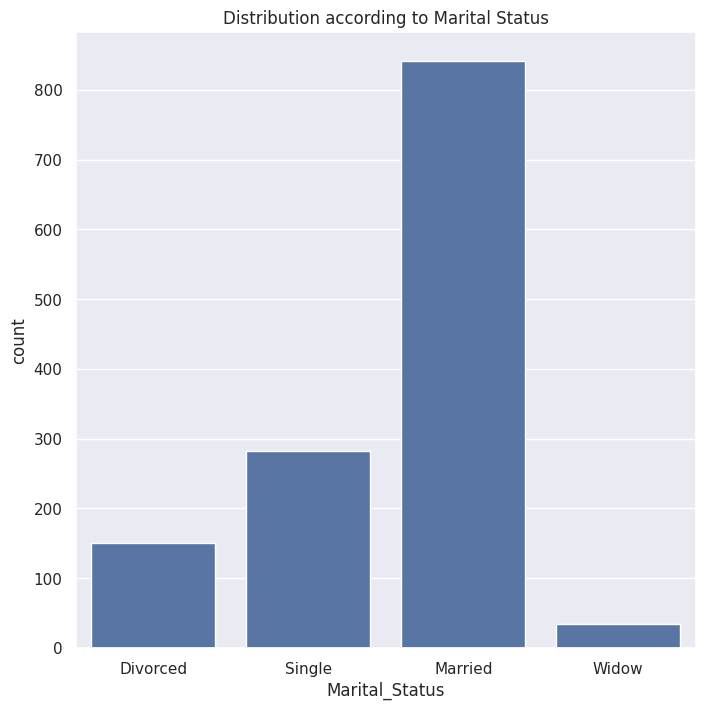

In [71]:
# Distribution by marital status
plt.figure(figsize= (8,8))
sns.countplot(x = df['Marital_Status'], data = df)
plt.title('Distribution according to Marital Status')
plt.show()

Most of the customer is married or livinig together compared to single customer.

**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

<Axes: xlabel='Income', ylabel='Total_Amount_Spent'>

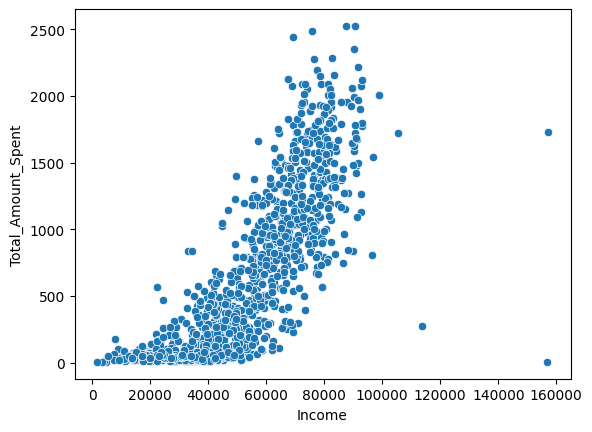

In [47]:
sns.scatterplot(data = df, x = 'Income', y = 'Total_Amount_Spent')

The above scaterplot shows The relationship between income and total_amount_spent and total_amount_spent is increses with the incresing income and also some outliers in the plot.

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

<Axes: >

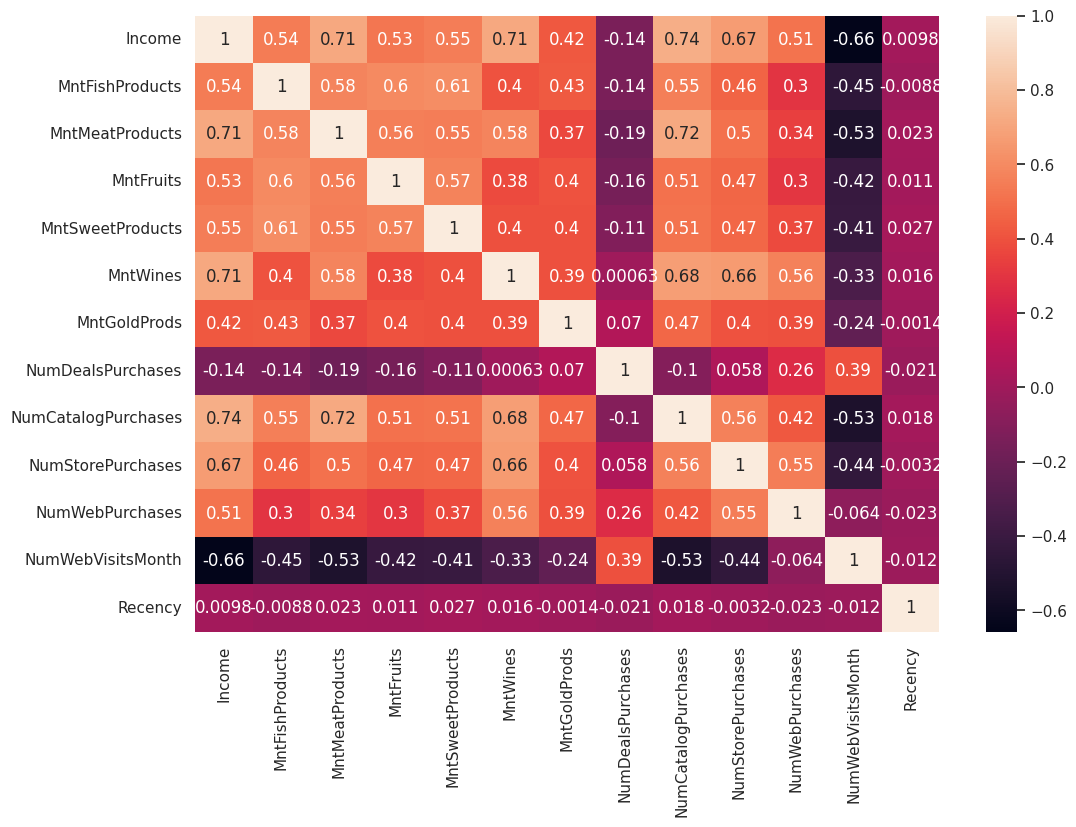

In [77]:
important_columns = df[['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']]
plt.figure(figsize = (12,8))
sns.heatmap(data = important_columns.corr(),annot = True )

This the correlation heatmap, Here we can use relationship between variables.

###Conclution:

Upon examining customer demographics, it was found that most customers fall within the 25 to 54 age range, hold a degree, and are married.
Income distribution skews to the right, indicating a presence of few customers with exceptionally high incomes.
Notable outliers exist in critical columns, such as income and expenditure patterns.
The likelihood of a customer making a purchase stands at 50%.

###Recommendations:
*  Concentrate marketing endeavors on customers aged 25 to 54, possessing a
degree, and married.
*  Implement additional discounts and promotions to stimulate increased purchasing activity among customers.
*   Enhance the company's website and online visibility to streamline the online purchasing process for customers.
*   Employ customer behavior and purchase history tracking to discern and capitalize on emerging trends and patterns.